In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('bit_coin_prices_trade.csv')
df.head()

,Unnamed: 0,bollinger_buy,bollinger_lower,bollinger_sell,bollinger_upper,macd_buy,macd_ema_diff,macd_signal_line,market_cap,price,rolling_mean,rolling_mean_buy,rolling_mean_sell,rsi,rsi_buy,rsi_sell,snapped_at,total_volume
0,0.0,False,NaN,False,NaN,True,0.000000,135.300000,1.500518e+09,135.30,NaN,False,False,NaN,False,False,2013-04-28,0.0
1,1.0,False,NaN,False,NaN,True,0.149423,139.000000,1.575032e+09,141.96,NaN,False,False,NaN,False,False,2013-04-29,0.0
2,2.0,False,NaN,False,NaN,True,-0.016132,137.483607,1.501657e+09,135.30,NaN,False,False,NaN,False,False,2013-04-30,0.0
3,3.0,False,NaN,False,NaN,True,-0.751748,130.544715,1.298952e+09,117.00,NaN,False,False,NaN,False,False,2013-05-01,0.0
4,4.0,False,NaN,False,NaN,True,-1.675627,122.478701,1.148668e+09,103.43,NaN,False,False,NaN,False,False,2013-05-02,0.0


In [8]:
just_dates_and_prices_df = df[['snapped_at', 'price']]
just_dates_and_prices_df.head()

,snapped_at,price
0,2013-04-28,135.30
1,2013-04-29,141.96
2,2013-04-30,135.30
3,2013-05-01,117.00
4,2013-05-02,103.43


In [10]:
just_dates_and_prices_df.dtypes

snapped_at     object
price         float64
dtype: object

In [11]:
just_dates_and_prices_df['snapped_at'] = pd.DatetimeIndex(just_dates_and_prices_df['snapped_at'])
just_dates_and_prices_df.dtypes

/home/ak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


snapped_at    datetime64[ns]
price                float64
dtype: object

In [12]:
just_dates_and_prices_df.head()

,snapped_at,price
0,2013-04-28,135.30
1,2013-04-29,141.96
2,2013-04-30,135.30
3,2013-05-01,117.00
4,2013-05-02,103.43


In [16]:
training_data = just_dates_and_prices_df.rename(columns={'snapped_at': 'ds', 'price': 'y'})

In [17]:
training_data.head()

,ds,y
0,2013-04-28,135.30
1,2013-04-29,141.96
2,2013-04-30,135.30
3,2013-05-01,117.00
4,2013-05-02,103.43


Text(0.5,0,'Date')

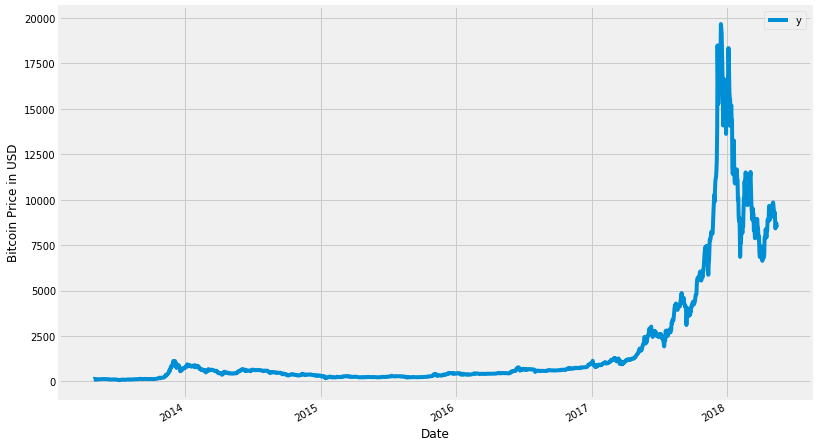

In [18]:
ax = training_data.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Bitcoin Price in USD')
ax.set_xlabel('Date')

In [19]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

# the learning
my_model.fit(training_data)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/ak/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [20]:
future_dates = my_model.make_future_dataframe(periods=30)
future_dates.tail()

,ds
1868,2018-06-11
1869,2018-06-12
1870,2018-06-13
1871,2018-06-14
1872,2018-06-15


In [21]:
training_data.tail()

,ds,y
1838,2018-05-12,8421.00
1839,2018-05-13,8486.67
1840,2018-05-14,8709.46
1841,2018-05-15,8672.90
1842,2018-05-16,8480.16


In [22]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1868,2018-06-11,12734.560988,10299.136929,15113.376726
1869,2018-06-12,12744.055036,10318.172759,15140.217174
1870,2018-06-13,12768.089806,10323.541945,15187.872539
1871,2018-06-14,12791.606585,10403.615160,15221.930385
1872,2018-06-15,12814.788605,10282.704626,15444.652534


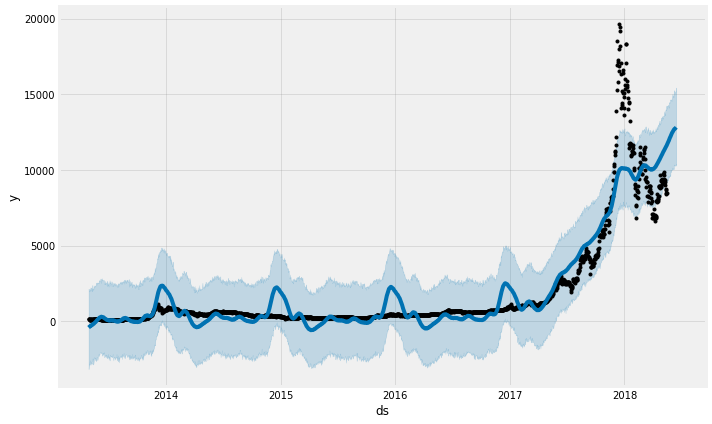

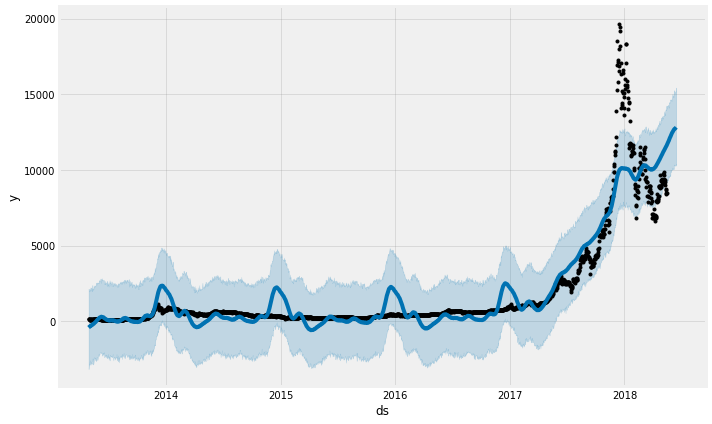

In [23]:
my_model.plot(forecast, uncertainty=True)

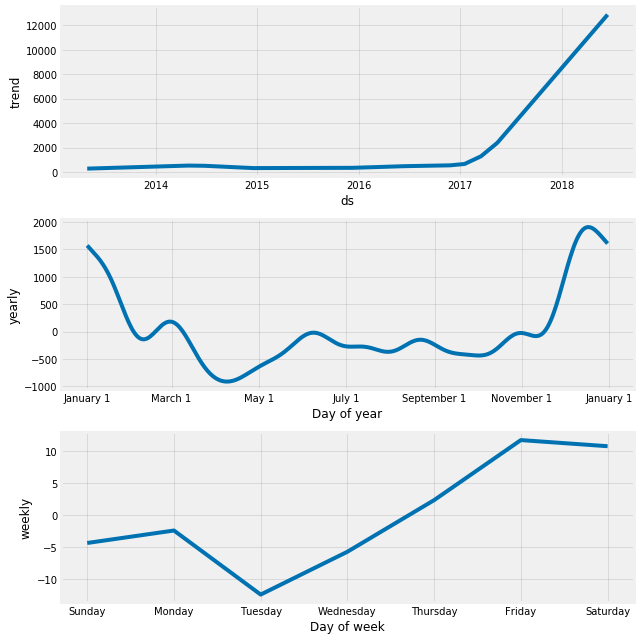

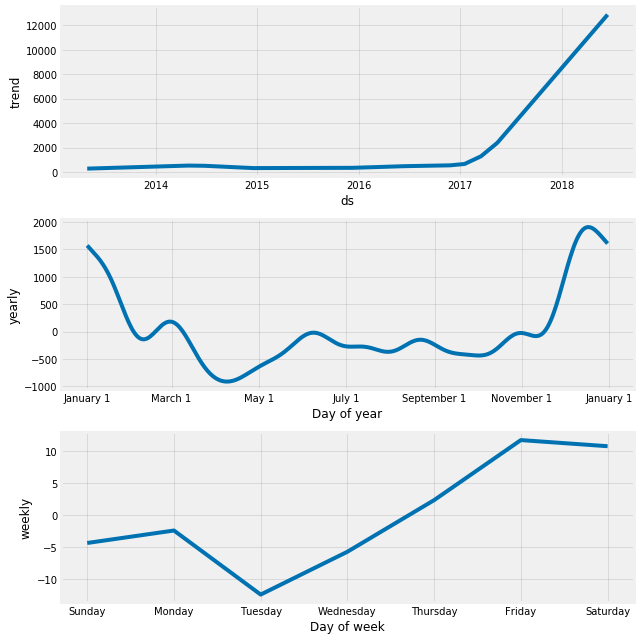

In [24]:
my_model.plot_components(forecast)